<a href="https://colab.research.google.com/github/Jayeshj2212/Machine-Learning-Problem-Statements/blob/main/Implementing_CNN_on_CIFAR_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#impoorting required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
#loading dataset from keras dataset

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train.shape

(50000, 32, 32, 3)

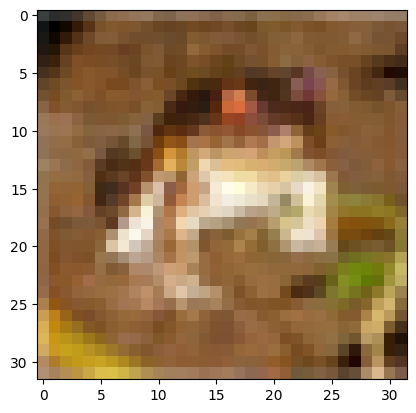

In [ ]:
plt.imshow(X_train[0])

In [ ]:
#to get range between 0 - 1 we divide all by 255.0
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
#trying with ANN

ann = models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                        layers.Dense(3000, activation='relu'),
                        layers.Dense(1000, activation='relu'),
                        layers.Dense(10, activation='sigmoid')])

In [ ]:
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#training model with ann
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 216s 138ms/step - loss: 1.8131 - accuracy: 0.3545
Epoch 2/5
1563/1563 [==============================] - 165s 106ms/step - loss: 1.6260 - accuracy: 0.4246
Epoch 3/5
1563/1563 [==============================] - 162s 104ms/step - loss: 1.5433 - accuracy: 0.4549
Epoch 4/5
1563/1563 [==============================] - 167s 107ms/step - loss: 1.4848 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 167s 107ms/step - loss: 1.4353 - accuracy: 0.4936


Now will try with CNN because ANN gives low Accuracy

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5086 - accuracy: 0.4590
Epoch 2/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1745 - accuracy: 0.5857
Epoch 3/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0489 - accuracy: 0.6308
Epoch 4/5
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9674 - accuracy: 0.6624
Epoch 5/5
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9147 - accuracy: 0.6817


In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 8s 25ms/step - loss: 1.0073 - accuracy: 0.6516


[1.007323980331421, 0.6516000032424927]

TypeError: ignored

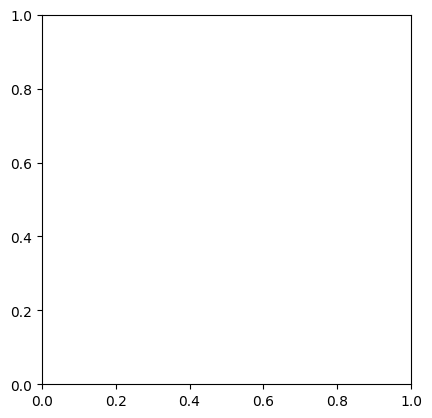

In [ ]:
plt.imshow(y_test[10])